In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')
df = pd.read_csv('winequality-red.csv')
df.head

<bound method NDFrame.head of       acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  cloretos  \
0             7.4            0.70           0.00              1.9    76.000   
1             7.8            0.88           0.00              2.6    98.000   
2             7.8            0.76           0.04              2.3    92.000   
3            11.2            0.28           0.56              1.9    75.000   
4             7.4            0.70           0.00              1.9    76.000   
5             7.4            0.66           0.00              1.8    75.000   
6             7.9            0.60           0.06              1.6    69.000   
7             7.3            0.65           0.00              1.2    65.000   
8             7.8            0.58           0.02              2.0    73.000   
9             7.5            0.50           0.36              6.1    71.000   
10            6.7            0.58           0.08              1.8     0.097   
11            7.5     

In [2]:
df.shape

(1599, 12)

In [3]:
X = df.drop('qualidade',axis=1).values
y = df['qualidade'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
neighbors = np.arange(1,12)
print (neighbors)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

[ 1  2  3  4  5  6  7  8  9 10 11]


In [4]:
for i,k in enumerate(neighbors):    
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)    
    train_accuracy[i] = knn.score(X_train, y_train)    
    test_accuracy[i] = knn.score(X_test, y_test) 

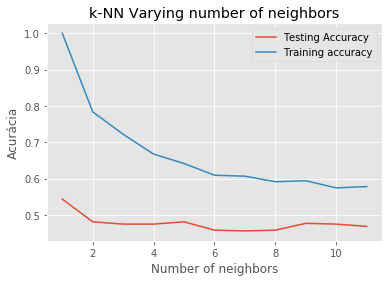

In [5]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Acurácia')
plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.54374999999999996

In [7]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,4,5,6,7,8,All
True,,,,,,
3,1,0,2,0,0,3
4,0,6,7,3,0,16
5,12,119,60,13,0,204
6,3,47,119,21,2,192
7,0,17,20,22,1,60
8,0,0,2,2,1,5
All,16,189,210,61,4,480
